In [161]:
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sqlite3
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [162]:
nbaplayer = pd.read_csv('./NBA_player_of_the_week.csv')

In [163]:
nbaplayer.head(-15)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,"Mar 10, 1985",1980,6-4,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,"Mar 3, 1985",1982,6-3,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,"Feb 24, 1985",1981,6-6,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,"Feb 17, 1985",1979,6-9,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,"Feb 3, 1985",1982,6-7,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


In [164]:
del nbaplayer['Conference']

In [165]:
nbaplayer.columns

Index(['Age', 'Date', 'Draft Year', 'Height', 'Player', 'Position', 'Season',
       'Season short', 'Seasons in league', 'Team', 'Weight', 'Real_value'],
      dtype='object')

In [166]:
del nbaplayer['Real_value']

In [167]:
nbaplayer['Weight'].describe()

count     1145
unique      96
top        250
freq       106
Name: Weight, dtype: object

In [168]:
nbaplayer.isnull().any()

Age                  False
Date                 False
Draft Year           False
Height               False
Player               False
Position             False
Season               False
Season short         False
Seasons in league    False
Team                 False
Weight               False
dtype: bool

In [169]:
nbaplayer.shape

(1145, 11)

In [170]:
nbaplayer.iloc[ [1054] ]

,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight
1054,27,"Nov 2, 2015",2009,6-3,Stephen Curry,G,2015-2016,2016,6,Golden State Warriors,190


In [171]:
nbaplayer['weight'] = nbaplayer['Weight'].str.extract('(\d+)', expand=True)

In [172]:
del nbaplayer['Weight']

In [173]:
weight = nbaplayer['weight']
Weight = tuple(int(i) for i in weight)
len(Weight)

1145

In [174]:
nbaplayer['Weight'] = Weight

In [175]:
del nbaplayer['weight']

In [176]:
Weight = nbaplayer.iloc[0:1055, 10].values 

In [177]:
weight = Weight/2.2

In [178]:
weight

array([ 85.90909091,  93.18181818, 100.        , ..., 100.        ,
       126.81818182,  86.36363636])

In [179]:
Weight = nbaplayer.iloc[1055:, 10].values 
Weight

array([100,  91, 105,  86, 100, 100, 120,  88,  95, 111,  83, 104, 113,
       114,  84,  86, 100, 122, 113, 104, 100, 102, 105,  86,  95, 100,
        84,  91, 100, 100, 113, 116, 101,  91, 114, 109, 105, 115, 100,
       100, 113,  85, 113,  91, 104, 113,  95,  88, 113, 118, 113,  91,
       100,  88, 100, 115, 113, 100, 127, 100, 106,  86, 113,  88,  86,
        79, 100,  86,  94,  79, 100,  91, 113,  79,  95, 109, 113, 100,
        86, 115, 100, 111, 107, 113, 109, 100,  95, 122, 101, 100])

In [180]:
weight1 = np.append(weight,Weight)

In [181]:
len(weight1)

1145

In [182]:
nbaplayer['Weight1']= weight1

In [183]:
del nbaplayer['Weight']

In [184]:
nbaplayer.head()

,Age,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight1
0,29,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,85.909091
1,23,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,93.181818
2,28,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,100.000000
3,37,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,102.272727
4,28,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,100.000000


In [185]:
print('The mean is:' + ' ' + str(nbaplayer['Weight1'].mean()))
print('The max value is:' + ' ' + str(nbaplayer['Weight1'].max()))
print('The min value is:' + ' ' + str(nbaplayer['Weight1'].min()))

The mean is: 102.71234616911485
The max value is: 147.72727272727272
The min value is: 68.18181818181817


In [186]:
nbaplayer.isnull().any()

Age                  False
Date                 False
Draft Year           False
Height               False
Player               False
Position             False
Season               False
Season short         False
Seasons in league    False
Team                 False
Weight1              False
dtype: bool

In [187]:
weight = nbaplayer['Weight1']
Weight = tuple(int(i) for i in weight)
len(Weight)

1145

In [188]:
nbaplayer['Weight'] = Weight

In [189]:
del nbaplayer['Weight1']

In [190]:
Position_counts = nbaplayer['Position'].value_counts()
Position_counts[-11:]

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

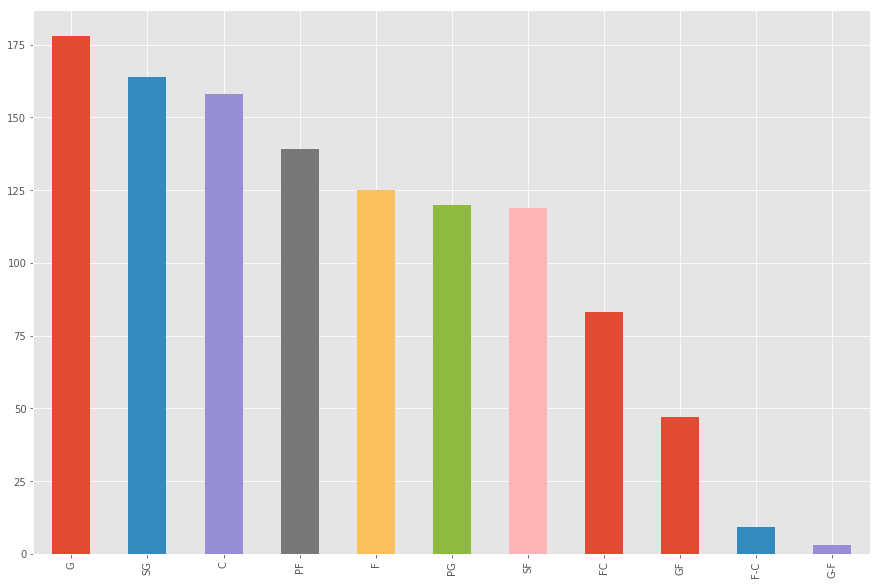

In [191]:
Position_counts[:11].plot(kind='bar', figsize=(15,10))

In [192]:
del nbaplayer['Height']

In [193]:
Team_counts = nbaplayer['Team'].value_counts()
Team_counts

Los Angeles Lakers        71
San Antonio Spurs         61
Cleveland Cavaliers       59
Miami Heat                57
Houston Rockets           56
Utah Jazz                 47
Phoenix Suns              45
Chicago Bulls             44
Orlando Magic             44
Golden State Warriors     44
Boston Celtics            43
Oklahoma City Thunder     41
Denver Nuggets            41
Philadelphia Sixers       37
New York Knicks           36
Portland Trail Blazers    33
Atlanta Hawks             32
New Jersey Nets           31
Toronto Raptors           31
Dallas Mavericks          30
Detroit Pistons           29
Los Angeles Clippers      27
Milwaukee Bucks           26
Minnesota Timberwolves    26
Sacramento Kings          23
Washington Wizards        23
Indiana Pacers            23
Seattle SuperSonics       20
Charlotte Hornets         15
New Orleans Hornets       12
Charlotte Bobcats         11
Memphis Grizzlies          9
Washington Bullets         8
Brooklyn Nets              5
New Orleans Pe

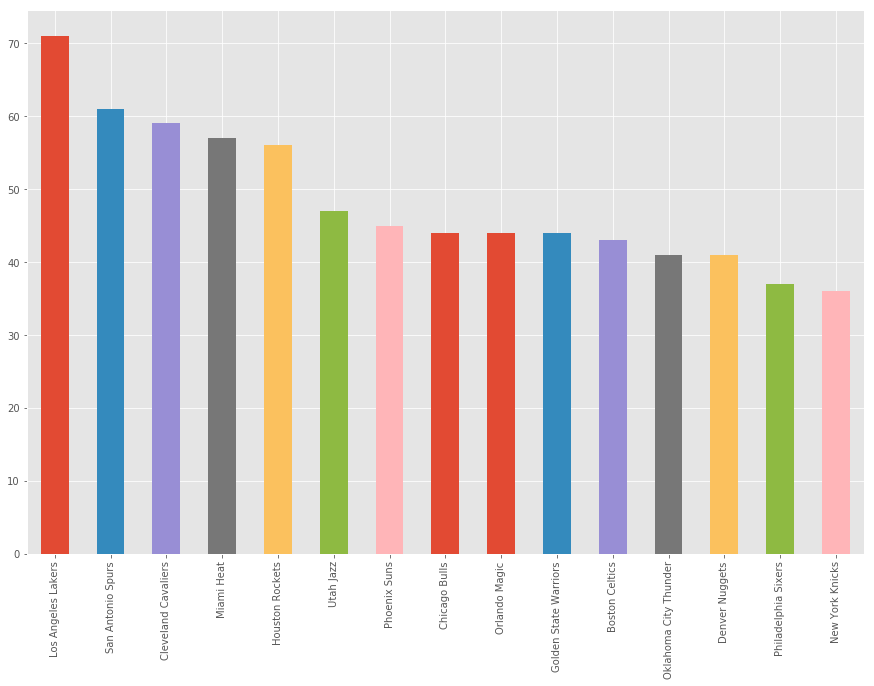

In [194]:
Team_counts[:15].plot(kind='bar', figsize=(15,10))

In [195]:
Player_counts = nbaplayer['Player'].value_counts()
Player_counts

LeBron James         61
Kobe Bryant          33
Kevin Durant         26
Michael Jordan       25
Allen Iverson        23
Tim Duncan           23
Karl Malone          23
Shaquille O'Neal     20
Kevin Garnett        20
Dwyane Wade          19
James Harden         18
Dwight Howard        18
Carmelo Anthony      18
Russell Westbrook    17
Jason Kidd           17
Paul Pierce          17
Dirk Nowitzki        16
David Robinson       15
Chris Paul           13
Magic Johnson        12
Tracy McGrady        12
Patrick Ewing        12
Hakeem Olajuwon      12
Stephen Curry        12
Vince Carter         11
Charles Barkley      11
Clyde Drexler        11
DeMar DeRozan        10
LaMarcus Aldridge    10
Chris Bosh            9
                     ..
Dion Waiters          1
Jamaal Magloire       1
Khris Middleton       1
Drew Gooden           1
Lucious Harris        1
Markieff Morris       1
Caron Butler          1
Mookie Blaylock       1
Ricky Pierce          1
Jeff Ruland           1
Andrew Bogut    

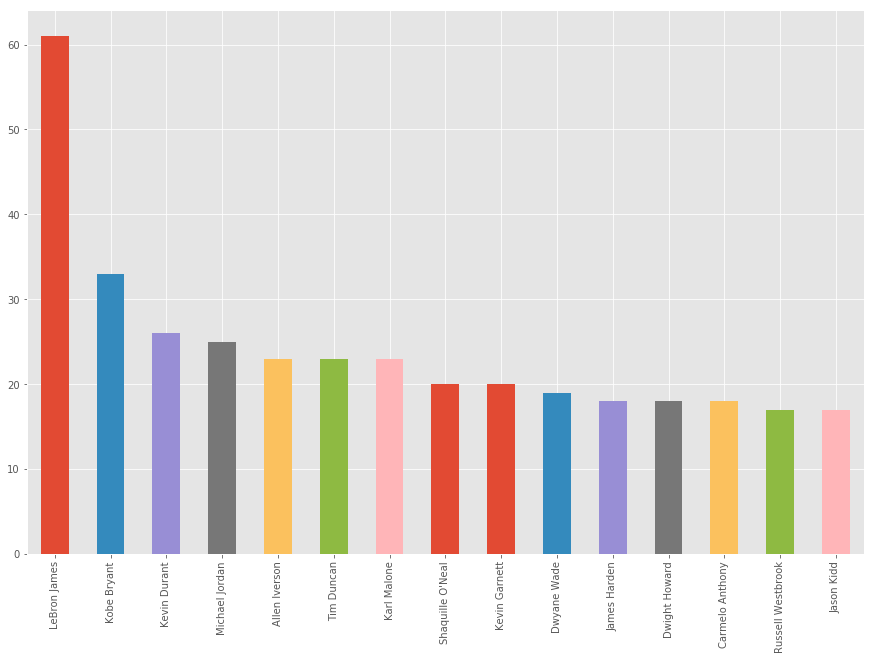

In [196]:
Player_counts[:15].plot(kind='bar', figsize=(15,10))

In [197]:
nbaplayer.head()

,Age,Date,Draft Year,Player,Position,Season,Season short,Seasons in league,Team,Weight
0,29,"Apr 14, 1985",1978,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,85
1,23,"Apr 7, 1985",1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,93
2,28,"Apr 1, 1985",1979,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,99
3,37,"Mar 24, 1985",1969,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,102
4,28,"Mar 17, 1985",1978,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,99


In [198]:
campeonesnba=['Los Angeles Lakers', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Detroit Pistons', 'Detroit Pistons', 'Chicago Bulls', 'Chicago Bulls', 'Chicago Bulls', 'Houston Rockets', 'Houston Rockets', 'Chicago Bulls', 'Chicago Bulls', 'Chicago Bulls', 'San Antonio Spurs', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Los Angeles Lakers', 'San Antonio Spurs', 'Detroit Pistons', 'San Antonio Spurs', 'Miami Heat', 'San Antonio Spurs', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Dallas Mavericks', 'Miami Heat', 'Miami Heat', 'San Antonio Spurs', 'Golden State Warriors', 'Cleveland Cavaliers', 'Golden State Warriors', 'Golden State Warriors']
len(campeonesnba)

34

In [199]:
añosnba = [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
len(añosnba)
añosnba1=str(añosnba)
print(añosnba1)


[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [200]:
Filas = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

In [201]:
d = {'Year' : pd.Series([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]),
     'Champion' : pd.Series(['Los Angeles Lakers', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Detroit Pistons', 'Detroit Pistons', 'Chicago Bulls', 'Chicago Bulls', 'Chicago Bulls', 'Houston Rockets', 'Houston Rockets', 'Chicago Bulls', 'Chicago Bulls', 'Chicago Bulls', 'San Antonio Spurs', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Los Angeles Lakers', 'San Antonio Spurs', 'Detroit Pistons', 'San Antonio Spurs', 'Miami Heat', 'San Antonio Spurs', 'Boston Celtics', 'Los Angeles Lakers', 'Los Angeles Lakers', 'Dallas Mavericks', 'Miami Heat', 'Miami Heat', 'San Antonio Spurs', 'Golden State Warriors', 'Cleveland Cavaliers', 'Golden State Warriors', 'Golden State Warriors'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33])}


In [202]:
nbachampion = pd.DataFrame(d)

In [203]:
years = nbachampion['Year']
Years = tuple(str(i) for i in years)
del nbachampion['Year']
nbachampion['Year'] = Years

In [204]:
nbachampion

,Champion,Year
0,Los Angeles Lakers,1985
1,Boston Celtics,1986
2,Los Angeles Lakers,1987
3,Los Angeles Lakers,1988
4,Detroit Pistons,1989
5,Detroit Pistons,1990
6,Chicago Bulls,1991
7,Chicago Bulls,1992
8,Chicago Bulls,1993
9,Houston Rockets,1994


In [205]:
nbaplayer['Champion'] = nbachampion['Champion']

In [206]:
nbaplayer.head()

,Age,Date,Draft Year,Player,Position,Season,Season short,Seasons in league,Team,Weight,Champion
0,29,"Apr 14, 1985",1978,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,85,Los Angeles Lakers
1,23,"Apr 7, 1985",1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,93,Boston Celtics
2,28,"Apr 1, 1985",1979,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,99,Los Angeles Lakers
3,37,"Mar 24, 1985",1969,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,102,Los Angeles Lakers
4,28,"Mar 17, 1985",1978,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,99,Detroit Pistons


In [207]:
Seasons = nbaplayer['Season short']
Seasons1 = tuple(str(i) for i in Seasons)
del nbaplayer['Season short']
nbaplayer['Season Shorts'] = Seasons1

In [208]:
año1 = '1985'
nbaplayer1985 = nbaplayer['Season Shorts'].str.contains(año1)
nbaplayer1 = pd.DataFrame(nbaplayer[nbaplayer1985])
nbaplayer1['Champion'] = 'Los Angeles Lakers'
nbaplayer1

,Age,Date,Draft Year,Player,Position,Season,Seasons in league,Team,Weight,Champion,Season Shorts
0,29,"Apr 14, 1985",1978,Micheal Ray Richardson,PG,1984-1985,6,New Jersey Nets,85,Los Angeles Lakers,1985
1,23,"Apr 7, 1985",1982,Derek Smith,SG,1984-1985,2,Los Angeles Clippers,93,Los Angeles Lakers,1985
2,28,"Apr 1, 1985",1979,Calvin Natt,F,1984-1985,5,Denver Nuggets,99,Los Angeles Lakers,1985
3,37,"Mar 24, 1985",1969,Kareem Abdul-Jabbar,C,1984-1985,15,Los Angeles Lakers,102,Los Angeles Lakers,1985
4,28,"Mar 17, 1985",1978,Larry Bird,SF,1984-1985,5,Boston Celtics,99,Los Angeles Lakers,1985
5,26,"Mar 10, 1985",1980,Darrell Griffith,SG,1984-1985,4,Utah Jazz,86,Los Angeles Lakers,1985
6,24,"Mar 3, 1985",1982,Sleepy Floyd,PG,1984-1985,2,Golden State Warriors,77,Los Angeles Lakers,1985
7,25,"Feb 24, 1985",1981,Mark Aguirre,SF,1984-1985,3,Dallas Mavericks,105,Los Angeles Lakers,1985
8,25,"Feb 17, 1985",1979,Magic Johnson,PG,1984-1985,5,Los Angeles Lakers,115,Los Angeles Lakers,1985
9,25,"Feb 3, 1985",1982,Dominique Wilkins,SF,1984-1985,2,Atlanta Hawks,90,Los Angeles Lakers,1985


In [209]:
for num in Filas:
    nbachampion.iloc[num]
    año = nbachampion.iloc[num]['Year']
    campeon = nbachampion.iloc[num]['Champion']
    nbaplayer1986 = nbaplayer['Season Shorts'].str.contains(año)
    nbaplayer87 = pd.DataFrame(nbaplayer[nbaplayer1986])
    nbaplayer87['Champion'] = campeon
    nbaplayer2 = nbaplayer1.append(nbaplayer87)
    nbaplayer1 = nbaplayer2

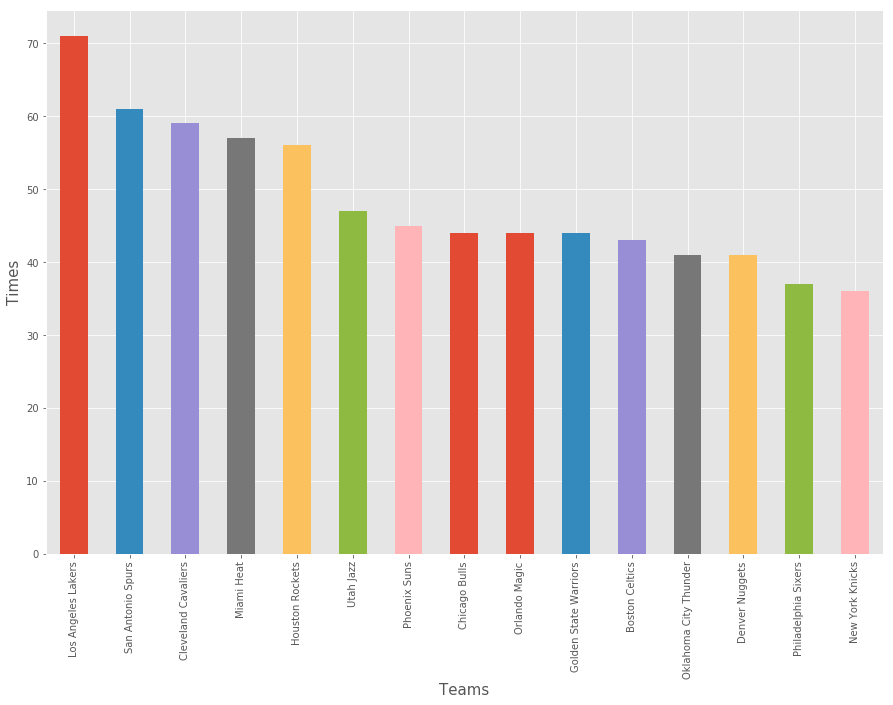

In [210]:
plt.ylabel('Times', fontsize=15)
plt.xlabel('Teams', fontsize=15)
Team_counts[:15].plot(kind='bar', figsize=(15,10))


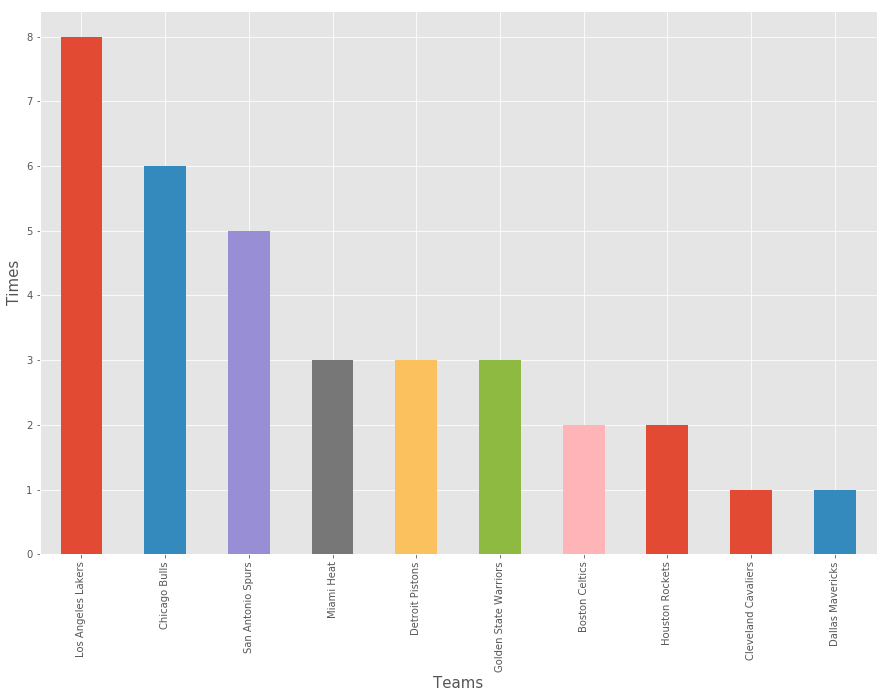

In [211]:
Champion_counts = nbachampion['Champion'].value_counts()
plt.ylabel('Times', fontsize=15)
plt.xlabel('Teams', fontsize=15)
Champion_counts[:15].plot(kind='bar', figsize=(15,10))

In [212]:
DifferentTeams = nbaplayer1['Team'].unique().tolist()
DifferentTeams
len(DifferentTeams)

35

In [213]:
#Mapeamos los datos

nbaplayer1['PositionEncoded'] = nbaplayer1['Position'].map({
    'G': 1,
    'SG': 2,
    'C': 3,
    'PF': 4,
    'F': 5,
    'PG': 6,
    'SF': 7,
    'FC': 8,
    'GF': 9,
    'F-C': 10,
    'G-F': 11, '':0} ).astype(int)

nbaplayer1['ChampionEncoded'] = nbaplayer1['Champion'].map({
    'Los Angeles Lakers': 1,
    'Chicago Bulls': 2,
    'San Antonio Spurs': 3,
    'Miami Heat': 4,
    'Golden State Warriors': 5,
    'Detroit Pistons': 6,
    'Houston Rockets': 7,
    'Boston Celtics': 8,
    'Dallas Mavericks': 9,
    'Cleveland Cavaliers': 10,'':0} ).astype(int)

nbaplayer1['TeamEncoded'] = nbaplayer1['Team'].map({
    'Los Angeles Lakers': 1,
    'Chicago Bulls': 2,
    'San Antonio Spurs': 3,
    'Miami Heat': 4,
    'Golden State Warriors': 5,
    'Detroit Pistons': 6,
    'Houston Rockets': 7,
    'Boston Celtics': 8,
    'Dallas Mavericks': 9,
    'Cleveland Cavaliers': 10,
    'New Jersey Nets': 11,
    'Los Angeles Clippers': 12,
    'Denver Nuggets': 13,
    'Utah Jazz': 14,
    'Atlanta Hawks': 15,
    'Washington Bullets': 16,
    'Milwaukee Bucks': 17,
    'Seattle SuperSonics': 18,
    'New York Knicks': 19,
    'Philadelphia Sixers': 20,
    'Phoenix Suns': 21,
    'Indiana Pacers': 22,
    'Portland Trail Blazers': 23,
    'Sacramento Kings': 24, 
    'Orlando Magic': 25,
    'Charlotte Hornets': 26,
    'Minnesota Timberwolves': 27,
    'Toronto Raptors': 28,
    'Washington Wizards': 29,
    'New Orleans Hornets': 30,
    'Memphis Grizzlies': 31,
    'Charlotte Bobcats': 32,
    'Oklahoma City Thunder': 33,
    'Brooklyn Nets': 34,
    'New Orleans Pelicans': 35, '':0} ).astype(int)
    
    
    
    
    

In [214]:
nbaplayer1[['PositionEncoded', 'ChampionEncoded']].groupby(['PositionEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

ChampionEncoded           
                           mean count  sum
PositionEncoded                           
1                      4.252809   178  757
2                      3.682927   164  604
3                      4.265823   158  674
4                      3.597122   139  500
5                      4.488000   125  561
6                      3.866667   120  464
7                      3.915966   119  466
8                      3.650602    83  303
9                      4.574468    47  215
10                     2.222222     9   20
11                     2.666667     3    8

In [215]:
nbaplayer1[['Season Shorts', 'ChampionEncoded']].groupby(['Season Shorts'], as_index=False).agg(['mean', 'count', 'sum'])

ChampionEncoded           
                         mean count  sum
Season Shorts                           
1985                        1    23   23
1986                        8    23  184
1987                        1    23   23
1988                        1    23   23
1989                        6    23  138
1990                        6    23  138
1991                        2    23   46
1992                        2    23   46
1993                        2    23   46
1994                        7    23  161
1995                        7    23  161
1996                        2    24   48
1997                        2    24   48
1998                        2    23   46
1999                        3    13   39
2000                        1    23   23
2001                        1    24   24
2002                        1    44   44
2003                        3    47  141
2004                        6    46  276
2005                        3    46  138
2006                        4    46  184
2007                        3    46  138
2008                        8    46  368
2009                        1    46   46
2010                        1    46   46
2011                        9    46  414
2012                        4    32  128
2013                        4    46  184
2014                        3    46  138
2015                        5    44  220
2016                       10    44  440
2017                        5    44  220
2018                        5    46  230

In [216]:
feautures = ['Season Shorts', 'PositionEncoded', 'TeamEncoded']
feautures1 = ['TeamEncoded', 'Season Shorts']

In [217]:
target = ['ChampionEncoded']

In [218]:
X = nbaplayer1[feautures1].copy()

In [219]:
Y = nbaplayer1[target].copy()


In [220]:
X.iloc[3]

TeamEncoded         1
Season Shorts    1985
Name: 3, dtype: object

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=525)

In [222]:
champion_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
champion_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [223]:
type(champion_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [224]:
predictions = champion_classifier.predict(X_test)

In [225]:
predictions[150:160]

array([5, 3, 3, 5, 3, 3, 8, 5, 4, 3])

In [226]:
Y_test[150:160]

,ChampionEncoded
995,5
523,3
545,3
1057,5
581,4
494,6
692,8
1106,5
941,3
498,6


In [227]:
accuracy_score(y_true = Y_test, y_pred = predictions)

0.7724867724867724